# German Credit data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True)                  # this code, allow us to work with offline plotly version
import plotly.graph_objs as go  

import sklearn

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn import metrics


from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
import sklearn.decomposition as skdc
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import classification_report

In [2]:
# READ THE TRAINING DATA AND TEST DATA INTO DATAFRAMES

df_credit = pd.read_csv('german.csv', delim_whitespace = True,header = None)

h = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings','employment_duration', 'installment_rate', 'personal_status_sex','other_debtors', 'present_residence', 'property', 'age','other_installment_plans', 'housing', 'number_credits', 'job','people_liable', 'telephone', 'foreign_worker', 'credit_risk']
df_credit.columns=h

df_credit.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


# Data Preparation


	Our dataset includes a broad type of socio-economic information on 1000 individuals. The variables included in the initial dataset are categorical variables, each with multiple categories. We proceed to transform these multi-categorical variables by transforming each sub-category of each variable into a binary explanatory variable, where value one is assigned for existence of the feature in the individual and value zero otherwise. This drastically increases the number of variables we have. In a section dedicated to the PCA-Logistic model, we tackle this problem of high dimensionality by limiting our explanatory variable to the variables with the highest information value. We divide our dataset into a “training” dataset and “testing” dataset in order to first fit our models and estimate our coefficients using training dataset and then evaluate the performance of our models using “testing” dataset. The training dataset includes 70% of the total dataset and the testing dataset includes 30% of total observations.


Check NaN values:

In [3]:
df_credit.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [5]:
cat_cols = [col for col in df_credit.columns if df_credit[col].dtypes == 'O']

for col in cat_cols:
    print(df_credit[col].value_counts(), "\n\n")

A14    394
A11    274
A12    269
A13     63
Name: status, dtype: int64 


A32    530
A34    293
A33     88
A31     49
A30     40
Name: credit_history, dtype: int64 


A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A410     12
A44      12
A48       9
Name: purpose, dtype: int64 


A61    603
A65    183
A62    103
A63     63
A64     48
Name: savings, dtype: int64 


A73    339
A75    253
A74    174
A72    172
A71     62
Name: employment_duration, dtype: int64 


A93    548
A92    310
A94     92
A91     50
Name: personal_status_sex, dtype: int64 


A101    907
A103     52
A102     41
Name: other_debtors, dtype: int64 


A123    332
A121    282
A122    232
A124    154
Name: property, dtype: int64 


A143    814
A141    139
A142     47
Name: other_installment_plans, dtype: int64 


A152    713
A151    179
A153    108
Name: housing, dtype: int64 


A173    630
A172    200
A174    148
A171     22
Name: job, dtype: int64 


A191    596
A192    404
Name: tel

### Attribute 1:  (qualitative) Status of existing checking account
*          A11 :      ... <    0 DM
* 	       A12 : 0 <= ... <  200 DM
* 	       A13 :      ... >= 200 DM / salary assignments for at least 1 year
*          A14 : no checking account


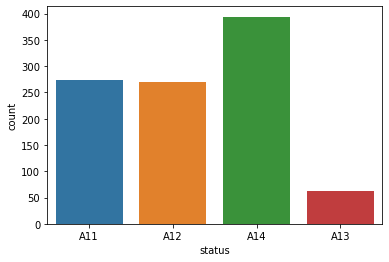

In [6]:
sns.countplot(df_credit['status'])

In [7]:
df_credit['status']=np.where(df_credit['status'] == 'A14', 'NA', df_credit['status'])
df_credit['status']=np.where(df_credit['status'] ==  'A12' , 'stable', df_credit['status'])
df_credit['status']=np.where(df_credit['status'] ==  'A13' , 'highly stable', df_credit['status'])
df_credit['status']=np.where(df_credit['status'] ==  'A11' , 'not stable', df_credit['status'])

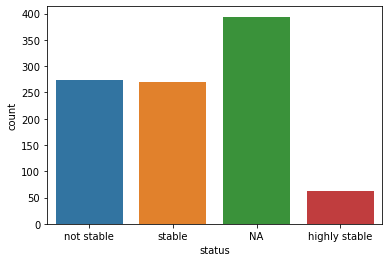

In [8]:
sns.countplot(df_credit['status'])

### Attribute 2:  (numerical)
*	      Duration in month


In [9]:
df_credit['duration'] = pd.cut(df_credit['duration'], [0,12,24,96])

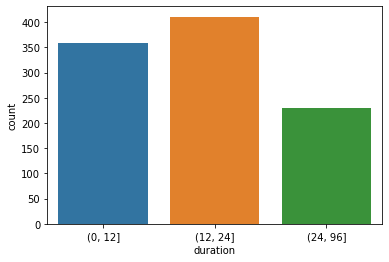

In [10]:
sns.countplot(df_credit['duration'])

### Attribute 3:  (qualitative)	   Credit history
*	      A30 : no credits taken/
		    all credits paid back duly
*              A31 : all credits at this bank paid back duly
*	      A32 : existing credits paid back duly till now
*              A33 : delay in paying off in the past
*	      A34 : critical account/
		    other credits existing (not at this bank)


In [11]:
df_credit['credit_history']=np.where(df_credit['credit_history'] != 'A33', 'no-delay', df_credit['credit_history'])
df_credit['credit_history']=np.where(df_credit['credit_history'] == 'A33', 'delay', df_credit['credit_history'])

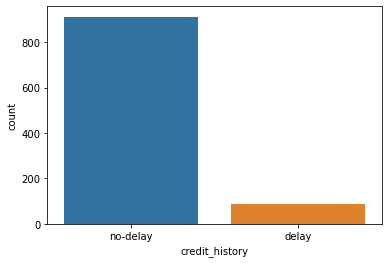

In [12]:
sns.countplot(df_credit['credit_history'])

### Attribute 4:  (qualitative) Purpose
*	      A40 : car (new)
*	      A41 : car (used)
*	      A42 : furniture/equipment
*	      A43 : radio/television
*	      A44 : domestic appliances
*	      A45 : repairs
*	      A46 : education
*	      A47 : (vacation - does not exist?)
*	      A48 : retraining
*	      A49 : business
*	      A410 : others

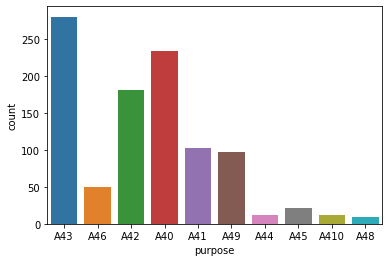

In [13]:
sns.countplot(df_credit['purpose'])

In [14]:
df_credit['purpose']=np.where(df_credit['purpose'] == 'A40', 'car', df_credit['purpose'])
df_credit['purpose']=np.where(df_credit['purpose'] == 'A41', 'car', df_credit['purpose'])

#We keep the 3 purposes which containts most of the individuals and we place other purposes into 'others' category 
df_credit['purpose']=np.where(df_credit['purpose'] == 'A49', 'others', df_credit['purpose'])
df_credit['purpose']=np.where(df_credit['purpose'] == 'A44', 'others', df_credit['purpose'])
df_credit['purpose']=np.where(df_credit['purpose'] == 'A43', 'others', df_credit['purpose'])
df_credit['purpose']=np.where(df_credit['purpose'] == 'A45', 'others', df_credit['purpose'])
df_credit['purpose']=np.where(df_credit['purpose'] == 'A47', 'others', df_credit['purpose'])
df_credit['purpose']=np.where(df_credit['purpose'] == 'A410', 'others', df_credit['purpose'])

df_credit['purpose']=np.where(df_credit['purpose'] == 'A42', 'furniture/equipment', df_credit['purpose'])

df_credit['purpose']=np.where(df_credit['purpose'] == 'A48', 'retraining/education', df_credit['purpose'])
df_credit['purpose']=np.where(df_credit['purpose'] == 'A46', 'retraining/education', df_credit['purpose'])

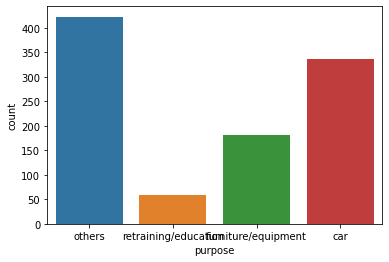

In [15]:
sns.countplot(df_credit['purpose'])

### Attribute 5:  (numerical)
*     Credit amount

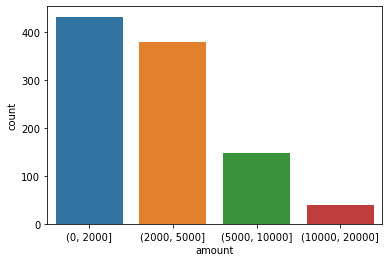

In [16]:
# Create "df_bad" dataframes with "df_good" 
#need them later for graphs
df_credit['amount_num'] = df_credit.loc[:,'amount'] 
df_credit['amount'] = pd.cut(df_credit['amount'], [0,2000,5000,10000,20000])
sns.countplot(df_credit['amount'])

### Attibute 6:  (qualitative) Savings account/bonds
*	      A61 :          ... <  100 DM
*	      A62 :   100 <= ... <  500 DM
*	      A63 :   500 <= ... < 1000 DM
*	      A64 :          .. >= 1000 DM
*         A65 :   unknown/ no savings account


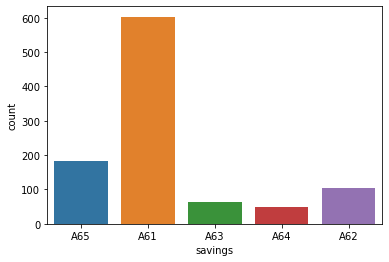

In [17]:
sns.countplot(df_credit['savings'])

In [18]:
df_credit['savings']=np.where(df_credit['savings'] == 'A65', 'NA', df_credit['savings'])
df_credit['savings']=np.where(df_credit['savings'] == 'A61', 'little', df_credit['savings'])
df_credit['savings']=np.where(df_credit['savings'] == 'A62', 'moderate', df_credit['savings'])
df_credit['savings']=np.where(df_credit['savings'] == 'A63', 'rich', df_credit['savings'])
df_credit['savings']=np.where(df_credit['savings'] == 'A64', 'very rich', df_credit['savings'])

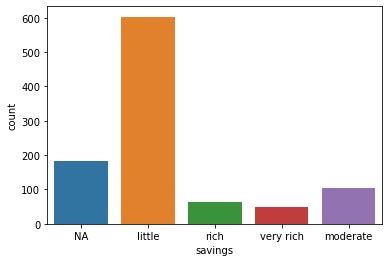

In [19]:
sns.countplot(df_credit['savings'])

### Attribute 7:  (qualitative) Present employment since
*	      A71 : unemployed
*	      A72 :       ... < 1 year
*	      A73 : 1  <= ... < 4 years  
*	      A74 : 4  <= ... < 7 years
*	      A75 :       .. >= 7 years

In [20]:
df_credit['employment_duration']=np.where(df_credit['employment_duration'] == 'A71', 'NA', df_credit['employment_duration'])
df_credit['employment_duration']=np.where(df_credit['employment_duration'] == 'A72', 'short', df_credit['employment_duration'])
df_credit['employment_duration']=np.where(df_credit['employment_duration'] == 'A73', 'moderate', df_credit['employment_duration'])
df_credit['employment_duration']=np.where(df_credit['employment_duration'] == 'A74', 'long', df_credit['employment_duration'])
df_credit['employment_duration']=np.where(df_credit['employment_duration'] == 'A75', 'very long', df_credit['employment_duration'])

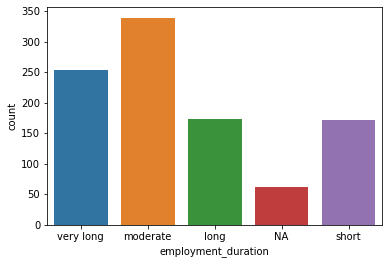

In [21]:
sns.countplot(df_credit['employment_duration'])

### Attribute 8:  (numerical)    Installment rate in percentage of disposable income
installment rate = the amount of money paid out per unit time

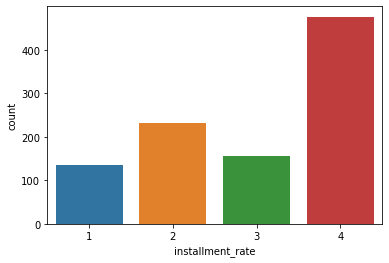

In [22]:
sns.countplot(df_credit['installment_rate'])

### Attribute 9:  (qualitative)	      Personal status and sex
*	      A91 : male   : divorced/separated
*	      A92 : female : divorced/separated/married
*         A93 : male   : single
*	      A94 : male   : married/widowed
*	      A95 : female : single (Not any in the data set)

In [23]:
# we cannot use gender variable because its forbiden to discriminate people by their gender
# (and we dont want to genarete gender discriminatory model)
# but we will use gender variable for statistical comparaison purpose (descriptive stat)

In [24]:
df_credit['gender'] = df_credit.loc[:,'personal_status_sex'] 

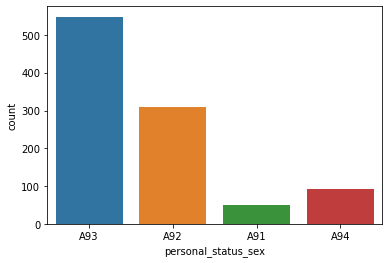

In [25]:
sns.countplot(df_credit['personal_status_sex'])

In [26]:
df_credit['personal_status_sex']=np.where(df_credit['personal_status_sex'] != 'A93', 'not single', df_credit['personal_status_sex'])
df_credit['personal_status_sex']=np.where(df_credit['personal_status_sex'] == 'A93', 'single', df_credit['personal_status_sex'])

In [27]:
df_credit = df_credit.rename(columns={'personal_status_sex':'personal_status'})

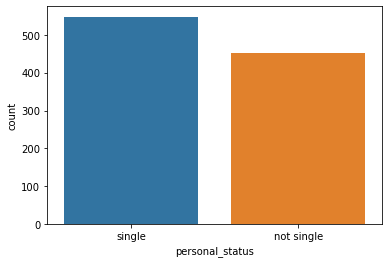

In [28]:
sns.countplot(df_credit['personal_status'])

In [29]:
df_credit['gender']=np.where(df_credit['gender'] !='A92', 'male', df_credit['gender'])
df_credit['gender']=np.where(df_credit['gender'] =='A92', 'female', df_credit['gender'])

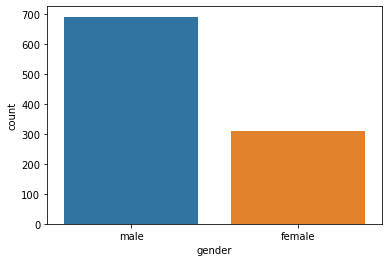

In [30]:
sns.countplot(df_credit['gender'])

### Attribute 10: (qualitative) Other debtors / guarantors
*	      A101 : none
*	      A102 : co-applicant
*	      A103 : guarantor


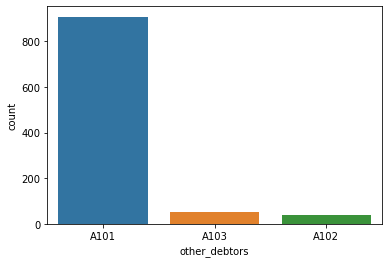

In [31]:
sns.countplot(df_credit['other_debtors'])

In [32]:
df_credit['other_debtors']=np.where(df_credit['other_debtors'] !='A101', 'guarantor/co-applicant', df_credit['other_debtors'])
df_credit['other_debtors']=np.where(df_credit['other_debtors'] =='A101', 'none', df_credit['other_debtors'])

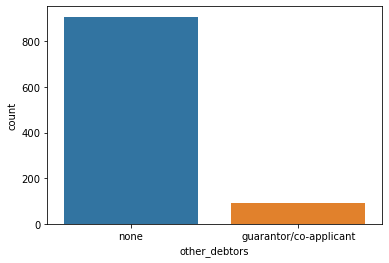

In [33]:
sns.countplot(df_credit['other_debtors'])

### Attribute 11: (numerical)
*     Present residence since

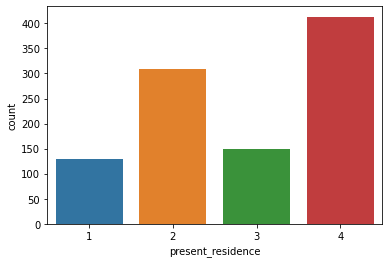

In [34]:
sns.countplot(df_credit['present_residence'])

### Attribute 12: (qualitative) Property
*	      A121 : real estate
*	      A122 : if not A121 : building society savings agreement/life insurance
*         A123 : if not A121/A122 : car or other, not in attribute 6
*	      A124 : unknown / no property

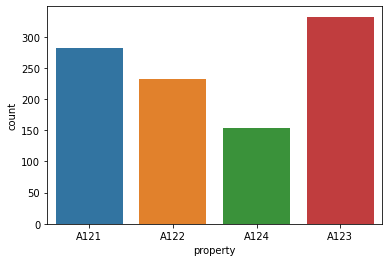

In [35]:
sns.countplot(df_credit['property'])

In [36]:
df_credit['property']=np.where(df_credit['property'] =='A121', 'real estate', df_credit['property'])
df_credit['property']=np.where(df_credit['property'] =='A122', 'car or other', df_credit['property'])
df_credit['property']=np.where(df_credit['property'] =='A123', 'car or other', df_credit['property'])
df_credit['property']=np.where(df_credit['property'] =='A124', 'unknown / no property', df_credit['property'])

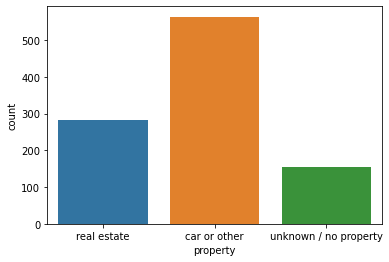

In [37]:
sns.countplot(df_credit['property'])

### Attribute 13: (numerical)
*	      Age in years


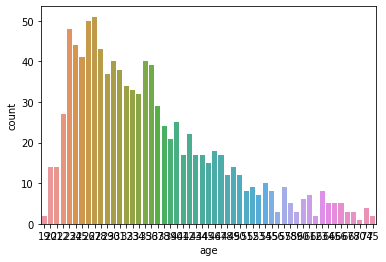

In [38]:
sns.countplot(df_credit['age'])

In [39]:
df_credit['age'] = pd.cut(df_credit['age'], [18, 25, 35, 55, 80], labels=['young','young adult','older adult','senior'])

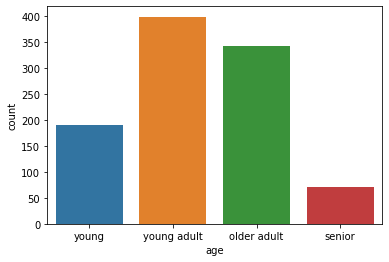

In [40]:
sns.countplot(df_credit['age'])

### Attribute 14: (qualitative)	 Other installment plans 
*	      A141 : bank
*	      A142 : stores
*	      A143 : none

In [41]:
df_credit['other_installment_plans']=np.where(df_credit['other_installment_plans'] =='A141', 'bank', df_credit['other_installment_plans'])
df_credit['other_installment_plans']=np.where(df_credit['other_installment_plans'] =='A142', 'stores', df_credit['other_installment_plans'])
df_credit['other_installment_plans']=np.where(df_credit['other_installment_plans'] =='A143', 'none', df_credit['other_installment_plans'])

### Attribute 15: (qualitative)	      Housing
*	      A151 : rent
*	      A152 : own
*	      A153 : for free

In [42]:
df_credit['housing']=np.where(df_credit['housing'] =='A151', 'rent', df_credit['housing'])
df_credit['housing']=np.where(df_credit['housing'] =='A152', 'own', df_credit['housing'])
df_credit['housing']=np.where(df_credit['housing'] =='A153', 'for free', df_credit['housing'])

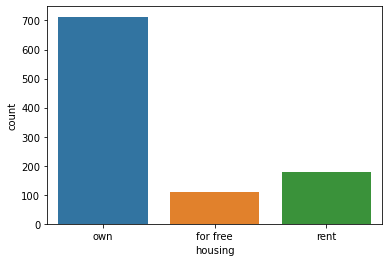

In [43]:
sns.countplot(df_credit['housing'])

### Attribute 16: (numerical)
*              Number of existing credits at this bank

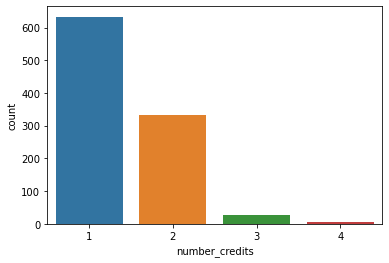

In [44]:
sns.countplot(df_credit['number_credits'])

In [45]:
df_credit['number_credits']=np.where(df_credit['number_credits'] == '1', '1', df_credit['number_credits'])
df_credit['number_credits']=np.where(df_credit['number_credits'] != '1', 'more than 1', df_credit['number_credits'])

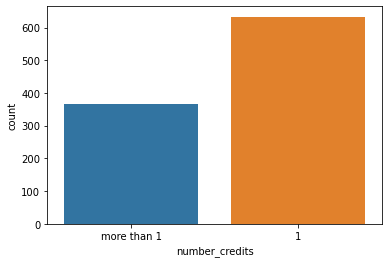

In [46]:
sns.countplot(df_credit['number_credits'])

### Attribute 17: (qualitative) Job
*         A171 : unemployed/ unskilled  - non-resident
*	      A172 : unskilled - resident
*	      A173 : skilled employee / official
*	      A174 : management/ self-employed/highly qualified employee/ officer


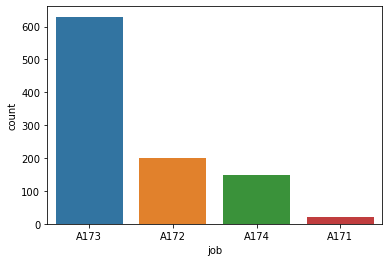

In [47]:
sns.countplot(df_credit['job'])

In [48]:
df_credit['job']=np.where(df_credit['job'] == 'A171', 'unskilled/unemployed', df_credit['job'])
df_credit['job']=np.where(df_credit['job'] == 'A172', 'unskilled/unemployed', df_credit['job'])
df_credit['job']=np.where(df_credit['job'] == 'A173', 'skilled', df_credit['job'])
df_credit['job']=np.where(df_credit['job'] == 'A174', 'highly qualified', df_credit['job'])

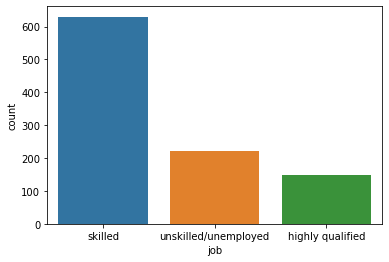

In [49]:
sns.countplot(df_credit['job'])

### Attribute 18: (numerical)   Number of people being liable to provide maintenance for

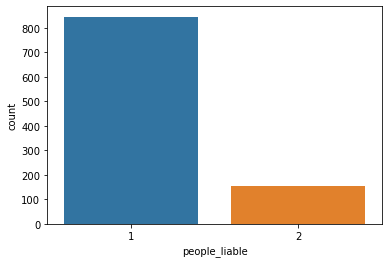

In [50]:
sns.countplot(df_credit['people_liable'])

### Attribute 19: (qualitative)	      Telephone
*	      A191 : none
*	      A192 : yes, registered under the customers name


In [51]:
df_credit['telephone']=np.where(df_credit['telephone'] == 'A191', 'none', df_credit['telephone'])
df_credit['telephone']=np.where(df_credit['telephone'] == 'A192', 'yes', df_credit['telephone'])

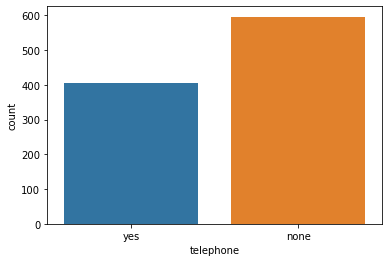

In [52]:
sns.countplot(df_credit['telephone'])

### Attribute 20: (qualitative)
*         foreign worker
*	      A201 : yes
*	      A202 : no


In [53]:
df_credit['foreign_worker']=np.where(df_credit['foreign_worker'] == 'A202', 'none', df_credit['foreign_worker'])
df_credit['foreign_worker']=np.where(df_credit['foreign_worker'] == 'A201', 'yes', df_credit['foreign_worker'])

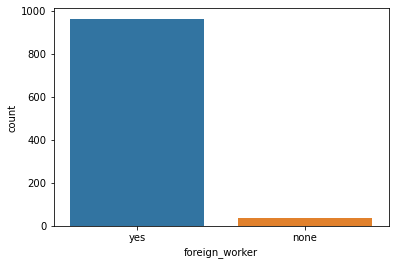

In [54]:
sns.countplot(df_credit['foreign_worker'])

## Credit risk
(1 = Good,  2 = Bad)

In [55]:
df_credit['credit_risk'] = df_credit['credit_risk'].astype('int64')

In [56]:
df_credit['credit_risk']=np.where(df_credit['credit_risk'] == 2, 'bad', df_credit['credit_risk'])
df_credit['credit_risk']=np.where(df_credit['credit_risk'] != 'bad', 'good', df_credit['credit_risk'])

### Data Info

In [57]:
cat_cols = [col for col in df_credit.columns if df_credit[col].dtypes == 'O']

for col in cat_cols:
    print(df_credit[col].value_counts(), "\n\n")

NA               394
not stable       274
stable           269
highly stable     63
Name: status, dtype: int64 


no-delay    912
delay        88
Name: credit_history, dtype: int64 


others                  423
car                     337
furniture/equipment     181
retraining/education     59
Name: purpose, dtype: int64 


little       603
NA           183
moderate     103
rich          63
very rich     48
Name: savings, dtype: int64 


moderate     339
very long    253
long         174
short        172
NA            62
Name: employment_duration, dtype: int64 


single        548
not single    452
Name: personal_status, dtype: int64 


none                      907
guarantor/co-applicant     93
Name: other_debtors, dtype: int64 


car or other             564
real estate              282
unknown / no property    154
Name: property, dtype: int64 


none      814
bank      139
stores     47
Name: other_installment_plans, dtype: int64 


own         713
rent        179
for free    108
N

In [58]:
trace0 = go.Bar(
            x = df_credit[df_credit['credit_risk']== 'good']['credit_risk'].value_counts().index.values,
            y = df_credit[df_credit['credit_risk']== 'good']['credit_risk'].value_counts().values,
            name='good')

trace1 = go.Bar(
            x = df_credit[df_credit['credit_risk']== 'bad']['credit_risk'].value_counts().index.values,
            y = df_credit[df_credit['credit_risk']== 'bad']['credit_risk'].value_counts().values,
            name='bad')


data = [trace0, trace1]
layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[1].marker.line.width = 4
py.iplot(fig, filename='grouped-bar')

In [59]:
df_good = df_credit[df_credit['credit_risk'] == 'good']
df_bad = df_credit[df_credit['credit_risk'] == 'bad']

trace0 = go.Box(
    y=df_good["amount_num"],
    x=df_good["age"],
    name='Good credit',
    marker=dict(
        color='LightSkyBlue'
    )
)

trace1 = go.Box(
    y=df_bad['amount_num'],
    x=df_bad['age'],
    name='Bad credit',
    marker=dict(
        color='DarkSlateGrey'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (DM)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [60]:
trace0 = go.Box(
    y=df_good["amount_num"],
    x=df_good["gender"],
    name='Good credit',
    marker=dict(
        color='Purple'
    )
)

trace1 = go.Box(
    y=df_bad['amount_num'],
    x=df_bad['gender'],
    name='Bad credit',
    marker=dict(
        color='DarkSlateGrey'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (DM)',
        zeroline=False
    ),
    xaxis=dict(
        title='Gender Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [61]:
#Distribuition of Credit Amount by Housing visualization:

fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['housing'],
            "y": df_good['amount_num'],
            "legendgroup": 'good',
            "scalegroup": 'No',
            "name": 'good',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#673D43'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['housing'],
            "y": df_bad['amount_num'],
            "legendgroup": 'bad',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#AB9C2B'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

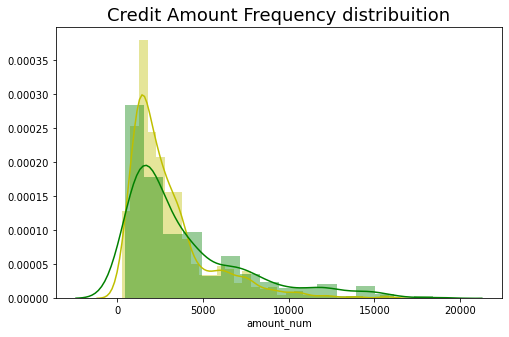

In [62]:
#Credit Amount Frequency distribuition:

plt.figure(figsize = (8,5))

g= sns.distplot(df_good['amount_num'], color='y')
g = sns.distplot(df_bad['amount_num'], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=18)
plt.show()

## Label Encoding & One-Hot Encoding

In [63]:
cat_cols = [col for col in df_credit.columns if df_credit[col].dtypes != 'int64']


def one_hot_encoder(dataframe, categorical_cols, nan_as_category=True):
     original_columns = list(dataframe.columns)
     dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=True)
     new_columns = [c for c in dataframe.columns if c not in original_columns]
     return dataframe, new_columns


df_credit, new_cols_ohe = one_hot_encoder(df_credit, cat_cols)

In [64]:
df_credit.head()

,installment_rate,present_residence,people_liable,amount_num,status_highly stable,status_not stable,status_stable,"duration_(12, 24]","duration_(24, 96]",credit_history_no-delay,purpose_furniture/equipment,purpose_others,purpose_retraining/education,"amount_(2000, 5000]","amount_(5000, 10000]","amount_(10000, 20000]",savings_little,savings_moderate,savings_rich,savings_very rich,employment_duration_long,employment_duration_moderate,employment_duration_short,employment_duration_very long,personal_status_single,other_debtors_none,property_real estate,property_unknown / no property,age_young adult,age_older adult,age_senior,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,number_credits_more than 1,job_skilled,job_unskilled/unemployed,telephone_yes,foreign_worker_yes,credit_risk_good,gender_male
0,4,4,1,1169,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,1,0,1,1,0,1,1,1,1
1,2,2,1,5951,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
2,2,3,2,2096,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1,1
3,2,4,2,7882,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,1
4,3,4,2,4870,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1


In [65]:
list1 = ['gender_male','amount_num', 'telephone_yes']
df_credit.drop(list1, axis= 1, inplace = True)

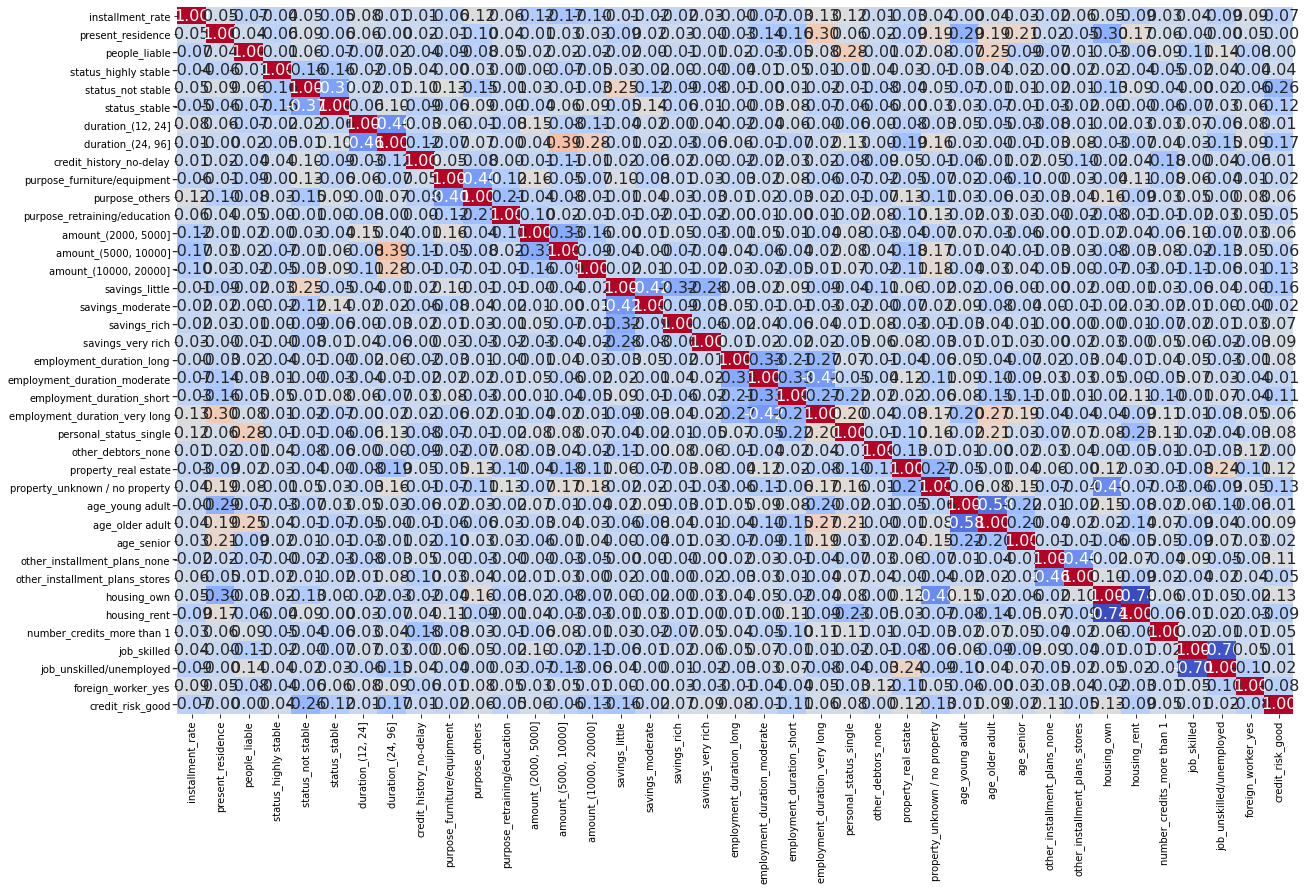

In [66]:
plt.figure(figsize=(20,13))
sns.heatmap(df_credit.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False)

In [67]:
df_credit.shape

(1000, 39)

##  Standardization

Standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

Standrize only numerical input and not binary variables

In [68]:
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].plot.hist(alpha=0.5, color='y')
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


like_num = [col for col in df_credit.columns if df_credit[col].dtypes != 'O' and len(df_credit[col].value_counts()) < 20]


cols_need_scale = [col for col in df_credit.columns if col not in "Id"
                   and col not in "Risk"
                   and col not in like_num]


if len(cols_need_scale) != 0:
    df_credit[cols_need_scale].head()
    df_credit[cols_need_scale].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T
    hist_for_nums(df_credit, cols_need_scale)


def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)


for col in cols_need_scale:
    df_credit[col] = robust_scaler(df_credit[col])

if len(cols_need_scale) != 0:
    df_credit[cols_need_scale].head()
    df_credit[cols_need_scale].describe().T
    hist_for_nums(df_credit, cols_need_scale)
    


## Creating test and train datasets

In [69]:
#Creating the X and y variables
X = df_credit.drop('credit_risk_good', 1).values
y = df_credit['credit_risk_good'].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=13)
a=X_train

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=19)
rf.fit(X_train, y_train)

ys_pred_rf1 = rf.predict(X_test)

In [71]:
#Model Accuracy, how often is the classifier correct ?
print("Accuracy:",metrics.accuracy_score(y_test, ys_pred_rf1))

Accuracy: 0.7233333333333334


In [72]:
print(sklearn.metrics.classification_report(y_test, ys_pred_rf1))

              precision    recall  f1-score   support

           0       0.36      0.06      0.11        79
           1       0.74      0.96      0.84       221

    accuracy                           0.72       300
   macro avg       0.55      0.51      0.47       300
weighted avg       0.64      0.72      0.64       300



In [73]:
fpr_rf1, tpr_rf1, thresholds_rf1 = roc_curve(y_test, ys_pred_rf1)
auc_rf1 = auc(fpr_rf1, tpr_rf1)

## Random Forest with bagging

In [74]:
# ensemble_prediction.py

import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import sklearn
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingClassifier, RandomForestClassifier
)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier

In [75]:
# Set the random seed, number of estimators
# and the "step factor" used to plot the graph of MSE
# for each method
random_state = 13
n_jobs = 1  # Parallelisation factor for bagging, random forests
n_estimators = 38
step_factor = 1
axis_step = int(n_estimators/step_factor)

In [76]:
# Pre-create the arrays which will contain the MSE for bagging method
estimators = np.zeros(axis_step)
bagging_mse = np.zeros(axis_step)
rf_mse = np.zeros(axis_step)
boosting_mse = np.zeros(axis_step)

In [77]:
# Estimate the Bagging MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Bagging Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    bagging = BaggingClassifier(
        RandomForestClassifier(), 
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bagging.predict(X_test))
    estimators[i] = step_factor*(i+1)
    bagging_mse[i] = mse

Bagging Estimator: 1 of 38...
Bagging Estimator: 2 of 38...
Bagging Estimator: 3 of 38...
Bagging Estimator: 4 of 38...
Bagging Estimator: 5 of 38...
Bagging Estimator: 6 of 38...
Bagging Estimator: 7 of 38...
Bagging Estimator: 8 of 38...
Bagging Estimator: 9 of 38...
Bagging Estimator: 10 of 38...
Bagging Estimator: 11 of 38...
Bagging Estimator: 12 of 38...
Bagging Estimator: 13 of 38...
Bagging Estimator: 14 of 38...
Bagging Estimator: 15 of 38...
Bagging Estimator: 16 of 38...
Bagging Estimator: 17 of 38...
Bagging Estimator: 18 of 38...
Bagging Estimator: 19 of 38...
Bagging Estimator: 20 of 38...
Bagging Estimator: 21 of 38...
Bagging Estimator: 22 of 38...
Bagging Estimator: 23 of 38...
Bagging Estimator: 24 of 38...
Bagging Estimator: 25 of 38...
Bagging Estimator: 26 of 38...
Bagging Estimator: 27 of 38...
Bagging Estimator: 28 of 38...
Bagging Estimator: 29 of 38...
Bagging Estimator: 30 of 38...
Bagging Estimator: 31 of 38...
Bagging Estimator: 32 of 38...
Bagging Estimator

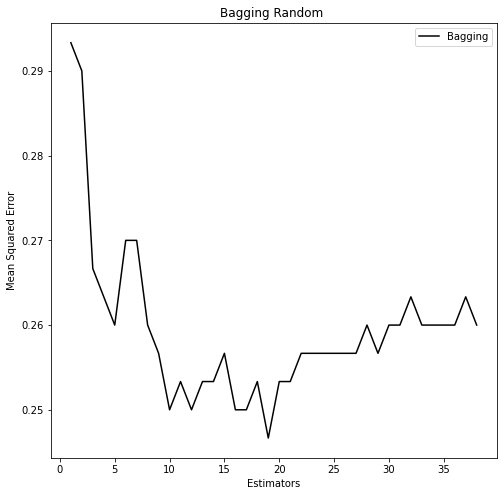

In [78]:
# Plot the chart of MSE 
plt.figure(figsize=(8, 8))
plt.title('Bagging Random ')
plt.plot(estimators, bagging_mse, 'b-', color="black", label='Bagging')
plt.legend(loc='upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()

The output is given in the following figure. It is very clear that when the number of estimators is 19 for the bootstrap-based method (bagging and random forests), the MSE is "settling down" .

In [79]:
# Set the random seed, number of estimators
# and the "step factor" used to plot the graph of MSE
# for each method
random_state = 13
n_jobs = 1  # Parallelisation factor for bagging, random forests
n_estimators = 19
step_factor = 1
axis_step = int(n_estimators/step_factor)


bagging = BaggingClassifier(RandomForestClassifier(), n_estimators=20,n_jobs=n_jobs,random_state=random_state)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=20,
                  n_jobs=1, random_state=13)

In [80]:
y_pred_bag = bagging.predict(X_test)
#Model Accuracy, how often is the classifier correct ?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bag))

Accuracy: 0.7466666666666667


In [81]:
print(sklearn.metrics.classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.53      0.32      0.40        79
           1       0.79      0.90      0.84       221

    accuracy                           0.75       300
   macro avg       0.66      0.61      0.62       300
weighted avg       0.72      0.75      0.72       300



In [82]:
fpr_bag, tpr_bag, thresholds_bag = roc_curve(y_test, y_pred_bag)
auc_bag = auc(fpr_bag, tpr_bag)

## Deep Neural Network

In [83]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(19, input_dim=38, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=40, batch_size=100, verbose=1)

Neural networks are a form of subsymbolic computation and they are based on the working of the brain. A neural network comprises a set of weighted edges and nodes. Learning is achieved by modification of these weights. The major criticisms of a neural network approach is its long training time to be able to obtain a high classification rate. In addition, the model is difficult to understand  the rules generated by neural networks (Black box model). We note that most of our attributes are discrete and it can facilitate feature selection and neural network training.


We create a Sequential model and add layers one at a time until the satisfactory result is obtained. When creating the first layer with the input_dim argument, it is setted to 38 as we have a total of 38 input variables. The rectified linear unit activation function (ReLU) is used on the first two layers and the Sigmoid (sigmoid)  function in the output layer. The first hidden layer has 19 nodes and uses the relu activation function. The second hidden layer has 40 nodes and uses the relu activation function. The output layer has one node and uses the sigmoid activation function. The optimizer is the “adam” which is the efficient stochastic gradient descent. It automatically tunes itself and gives good results in a wide range of problems. The model is trained on our training datasets.  Training occurred over 40 epochs and each of 100 epoch is split into batches. We note that neural networks are stochastic algorithms and the same data can train a different model with different skills each time the code is run. We comment on the results which is sended by our Jupiter file.

In [85]:
y_pred_keras = model.predict_classes(X_test)
# evaluate the keras model
#Model Accuracy, how often is the classifier correct ?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_keras))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 0.7533333333333333


The accuracy score of the neural network model is 0.753. This indicates that  75.3% of the total observations are correctly categorized. This score is pretty high but we have an asymmetric dataset. Therefore we have to look at other parameters (such as the classification matrix and ROC curve). 

In [86]:
#AUC
y_pred_keras = model.predict_classes(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
#ROC
auc_keras = auc(fpr_keras, tpr_keras)

In [87]:
print(sklearn.metrics.classification_report(y_test, y_pred_keras))

              precision    recall  f1-score   support

           0       0.53      0.52      0.53        79
           1       0.83      0.84      0.83       221

    accuracy                           0.75       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.75      0.75      0.75       300



The precision ratio indicates that of all credits that are labeled as ‘good’, 83% of them  are actually good credits. But the precision ratio of all credits that are labeled as ‘bad’ (bad credits) is 53%. False negative rate is high and nearly equal to true negative rate. 

The recall of 0.83 is obtained for good credits, the recall is 0.53 for bad credits. The recall for good credits (/for bad credits) indicates that off all the credits that are truly good (bad)  credits, the model labeled 83% (53%) of them. Even if we got the recall ratios above 0.5, it has less power when classifying bad credits. 

F-1 score is one of the common measures to rate how successful a classifier is and it’s a suitable measure for classification problems on imbalanced datasets. The F-1 score of good credits and bad credits respeful are 0.83 and 0.53. In view of this, the model is less successful to classify bad credits.  The precision ratio indicates that of all credits that are labeled as ‘good’, 83% of them  are actually good credits. But the precision ratio of all credits that are labeled as ‘bad’ (bad credits) is 53%. False negative rate is high and nearly equal to true negative rate. 

The recall of 0.83 is obtained for good credits, the recall is 0.53 for bad credits. The recall for good credits (/for bad credits) indicates that off all the credits that are truly good (bad)  credits, the model labeled 83% (53%) of them. Even if we got the recall ratios above 0.5, it has less power when classifying bad credits. 

F-1 score is one of the common measures to rate how successful a classifier is and it’s a suitable measure for classification problems on imbalanced datasets. The F-1 score of good credits and bad credits respeful are 0.83 and 0.53. In view of this, the model is less successful to classify bad credits.  

# LOGIT 

In this section, we implement a classic logistic regression. Probit and logit models are two very broadly used statistical models for outcome stored as a binary variable. In econometrics, logistic models are superior to linear models in modeling binary outcomes due to their better non-linear fit and more consistent features. In many cases, we see that simple logistic regressions can outperform the more advanced machine learning models in predicting the creditworthiness of an individual. Another advantage of logistic regression is that the effect of each variable on the outcome is measurable as opposed to machine learning methods. We will improve our logistic regression with smoothing and PCA methods as well in next sections.

Yi = Xi.B +i 

To proceed with our logistic regression, we have prepared our training and testing datasets and we have created binary variables out of our initial categorical variables in the previous stage of data preparation. We proceed to estimate our model coefficients using logistic models and our training dataset. The Y variable is our binary outcome variable regarding the creditworthiness of the individual. X is a matrix of binary explanatory variables and Beta is a vector of estimated coefficients that are going to be used in prediction in a testing dataset to evaluate the model performance. Afterwards, we use these coefficients to predict “creditworthiness” of 300 individuals in our test dataset. 

In [88]:
#logit_model=sm.Logit(y, X_pca)
#result=logit_model.fit()
#print(result.summary2())

logreg = LogisticRegression()
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
logreg.fit(X_train, y_train)
     
y_pred_log2 = logreg.predict(X_test)

In [89]:
#Model Accuracy, how often is the classifier correct ?
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [90]:
print(classification_report(y_test, y_pred_log2))

              precision    recall  f1-score   support

           0       0.52      0.49      0.51        79
           1       0.82      0.84      0.83       221

    accuracy                           0.75       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.74      0.75      0.74       300



In [91]:
fpr_log2, tpr_log2, thresholds_pca = roc_curve(y_test, y_pred_log2)
auc_log2 = auc(fpr_log2, tpr_log2)

The accuracy of the model is 0.75. The precision of this model for positive outcomes is much higher at 0.82 while for negative outcomes it is only 0.52. The recall of this model for positive outcome is again higher at 0.84 and 0.49 for negative outcome. The area under the ROC is equal to an acceptable 0.665. In next sections we will try to advance our logit model with Smoothing and PCA.

## Smoothing
In this section, we advance our logit model further by smoothing. The smoothing technique is used to overcome class imbalances. Because logistic regression classifiers as most machine learning classifiers/techniques might have a poor performance on the minority class. For instance, in our dataset we have 300 bad credit outcome variables and 700 good credit output. In other words, to overcome the poor performance on the bad credit outcome of the model, we use smoothing techniques. Moreover, SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. 


In [1]:
#pip install -U imbalanced-learn

In [93]:
from imblearn.over_sampling import SMOTE

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (700, 38)
Number transactions y_train dataset:  (700,)
Number transactions X_test dataset:  (300, 38)
Number transactions y_test dataset:  (300,)
Before OverSampling, counts of label '1': 479
Before OverSampling, counts of label '0': 221 

After OverSampling, the shape of train_X: (958, 38)
After OverSampling, the shape of train_y: (958,) 

After OverSampling, counts of label '1': 479
After OverSampling, counts of label '0': 479


Before smoothing, the input variable data set ( X_train dataset) has a total of 700 observations. The number of good credit observations was 479 and the number of bad credit observations was 221. The training data were imbalanced. After implementing SMOTE, the number of good (479)  and bad credits (479) became equal. The training datasets became balanced.  

# Smooth Logit

In [94]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

y_pred_logit_s = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logit_s))

Accuracy: 0.72


import statsmodels.api as sm
logit_model=sm.Logit(y_train_res, X_train_res)
result=logit_model.fit()
print(result.summary2())

In [95]:
fpr_logit_s, tpr_logit_s, thresholds_logit_s = roc_curve(y_test, y_pred_logit_s)
auc_logit_s = auc(fpr_logit_s, tpr_logit_s)

In [96]:
print(sklearn.metrics.classification_report(y_test, y_pred_logit_s))

              precision    recall  f1-score   support

           0       0.48      0.62      0.54        79
           1       0.85      0.76      0.80       221

    accuracy                           0.72       300
   macro avg       0.66      0.69      0.67       300
weighted avg       0.75      0.72      0.73       300



Looking at the observed outcome variables of creditworthiness and estimated outcome variables using our PCA-logit model for “test” dataset, we see that the accuracy of our model has slightly decreased to 0.72.Compared to logit regression, the precision for positive outcome has increased from 0.82 to 0.85 but precision for negative outcome has decreased from 0.52 to 0.48. Compared to logit regression, the F1-score for positive outcome has dropped from 0.83 to 0.80. But it has increased from 0.51 to 0.54. The model is still less successful to classify bad credits. But according to F1 score, it is the most successful model 

The AUC of ROC has increased from 0.665 to 0.688. The smote logistic model improved the ability of the model to distinguish the positive class values from the negative class values. We note that this model has the higher AUC score. In other words, there is a high chance that the classifier will be able to better distinguish the positive class values from the negative class values compared to other models.

# LOGIT WITH PCA

	In this section, we advance our logit model further by using Principle Component Analysis. Large datasets are increasingly widespread in many economic applications. In order to interpret such datasets, methods are required to drastically reduce their dimensionality in an interpretable way, such that most of the information in the data is preserved. Principal Component Analysis (PCA) is one of the oldest and most widely used. Its idea is simple—reduce the dimensionality of a dataset, while preserving as much ‘variability’ (i.e. statistical information) as possible. This means that ‘preserving as much variability as possible’ translates into finding new variables that are linear functions of those in the original dataset, that successively maximize variance and that are uncorrelated with each other. Finding such new variables, the principal components (PCs), reduces to solving an eigenvalue/eigenvector problem.

	Our purpose here is to reduce the number of binary explanatory variables in our model, while in contrast to expectations, increase the predictive power of our model. We proceed to transform the explanatory variables in our dataset using PCA. The cumulative explained variance of the newly transformed variables are illustrated in the graph below. We choose to keep the 27 first variables with highest explanatory power. Afterwards, we proceed to run a logistic regression and follow the steps described in the logistic regression section.


In [97]:
#pip install pca

In [98]:
from pca import pca

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [38] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [27] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


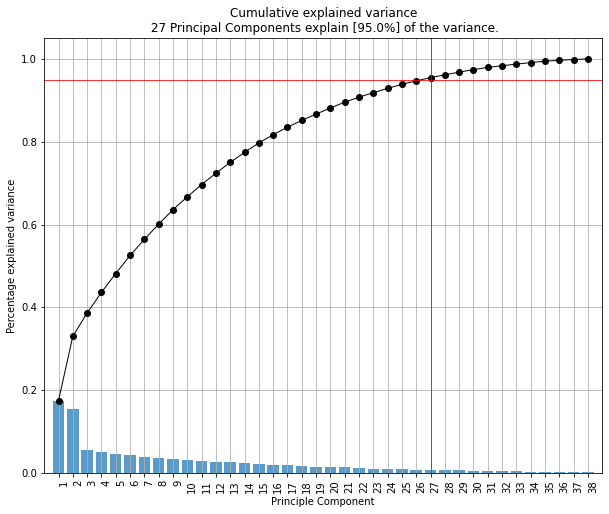

<Figure size 432x288 with 0 Axes>

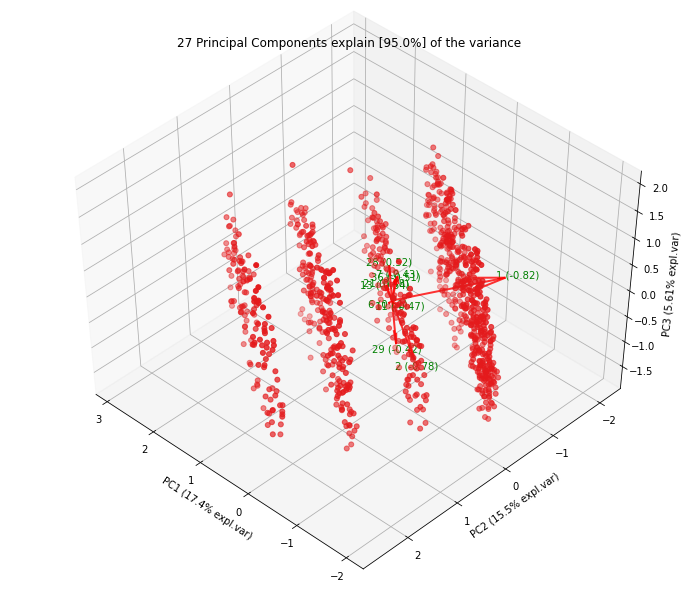

In [99]:
#HERE I DO PCA: I call the X variables that I did PCA on them "X_pca" + I add an intercept
from pca import pca
model = pca()
pca_data = model.fit_transform(X)
model.plot()
ax = model.biplot3d(n_feat=10, legend=False)
X_pca = pca_data['PC']
X_pca['intercept']= 1.0

#SPLIT DATA FOR PCA TRANSFORMED DATA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=13)

#SPLIT DATA FOR NONE-PCA TRANSFORMED DATA, I JUST ADD "1" IN FRONT OF SAME NAEMS
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=13)


In [100]:
#LOG WITH PCA-----------------------------------------------------

logreg = LogisticRegression()
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
logreg.fit(X_train, y_train)
     
y_pred_pca = logreg.predict(X_test)

In [101]:
#Model Accuracy, how often is the classifier correct ?
print("Accuracy:",metrics.accuracy_score(y_test, logreg.predict(X_test)))

Accuracy: 0.76


In [102]:
fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_test, y_pred_pca)
auc_pca = auc(fpr_pca, tpr_pca)

In [103]:
print(sklearn.metrics.classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.55      0.48      0.51        79
           1       0.82      0.86      0.84       221

    accuracy                           0.76       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.75      0.76      0.75       300



Looking at the observed outcome variables of creditworthiness and estimated outcome variables using our PCA-logit model for “test” dataset, we see that the accuracy of our model has slightly increased to 0.76. Compared to logit regression, the precision for positive outcome has remained at 0.82 but precision for negative outcome has increased from 0.52 to 0.55. The accuracy has increased from 0.84 to 0.86 for positive outcome and it has dropped from 0.49 to 0.48 for negative outcome. The AUC of ROC has increased slightly from 0.665 to 0.670. However the PCA seemed to slightly improve the normal logit model, but it is important to note that the PCA-logit model has used only 27 of explanatory variables.

## ROC Curve

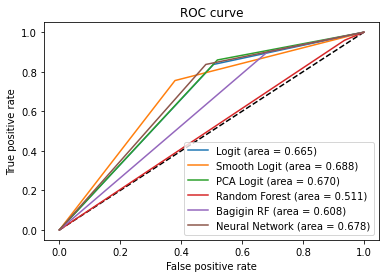

In [104]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log2, tpr_log2, label='Logit (area = {:.3f})'.format(auc_log2))
plt.plot(fpr_logit_s, tpr_logit_s,label='Smooth Logit (area = {:.3f})'.format(auc_logit_s))
plt.plot(fpr_pca, tpr_pca,label='PCA Logit (area = {:.3f})'.format(auc_pca))
plt.plot(fpr_rf1, tpr_rf1, label='Random Forest (area = {:.3f})'.format(auc_rf1))
plt.plot(fpr_bag, tpr_bag, label='Bagigin RF (area = {:.3f})'.format(auc_bag))
plt.plot(fpr_keras, tpr_keras, label='Neural Network (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()